### Loading dataset

In [92]:
from PIL import Image
import os
from glob import glob
import numpy as np



data_path = 'dog-breeds'

img_shape = 224
classes = os.listdir(data_path)

class_dict = {v: k for k, v in enumerate(classes)}
print(class_dict)
image_path = glob(data_path + "*", recursive = True)
print("Different classes are - ",", ".join(classes))
print("Total no. of classes are - ", len(classes))



{'rottweiler': 0, 'dalmatian': 1, 'german-shepherd': 2, 'beagle': 3, 'husky': 4, 'poodle': 5, 'bulldog': 6, 'labrador-retriever': 7}
Different classes are -  rottweiler, dalmatian, german-shepherd, beagle, husky, poodle, bulldog, labrador-retriever
Total no. of classes are -  8


In [10]:
pwd

'/Users/sukhpreetksandhu'

In [93]:
data = []
label = []
i = 0

for c in classes:
    if not c.startswith('.'):
        path = os.path.join(data_path, c)
        images = os.listdir(path)
        #print(c)
    

    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((img_shape,img_shape))
            image = np.array(image)

            if np.shape(image) == (img_shape, img_shape, 3):
                data.append(image)
                label.append(class_dict[c])
                i = i+1
        except:
            print("Error")
            print(path +'/'+ a)

data = np.array(data)
label = np.array(label)



### Data visualization for each class of data

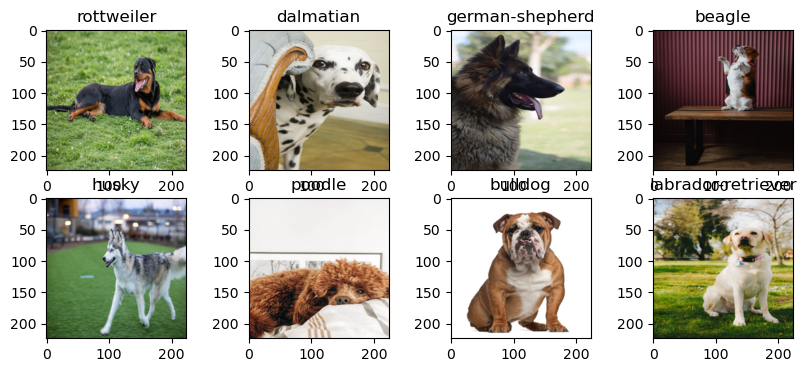

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))

for i in range(8):
    plt.subplot(2,4,i+1)
    img_ind = next(ind for ind, lab in enumerate(label) if lab == i)
    breed = next(breed for breed, value in class_dict.items() if value == i)
    plt.title(breed)
    plt.imshow(data[img_ind])

### Preprocessing the data

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
ascolumns = data.reshape(-1,3)

t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)

print(data.shape, label.shape)

X_trainval, X_test, y_trainval, y_test = train_test_split(data, label, train_size = 0.7,test_size = 0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_trainval, y_trainval, train_size = 0.8,test_size = 0.2,random_state =42)



(541, 224, 224, 3) (541,)


### One hot encoding 

In [96]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,8)
y_val = to_categorical(y_val,8)




### Preparing the environments and training the model

In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
#Conv2D(8, (3,3), activation = "relu")
#MaxPool2D(pool_size = (2,2))
#Dense(2, activation = "relu")


In [101]:
#model = Sequential()
#model.add(Conv2D(8, (3,3), input_shape = x_train.shape[1:], activation = 'relu'))
#model.add(MaxPool2D(pool_size = (2,2)))

#model.add(Flatten())
#model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(rate = 0.4))
#model.add(Dense(8, activation = 'softmax'))

model = Sequential()
model.add(Conv2D(8, (3,3), input_shape = x_train.shape[1:], activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(8, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(8, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dropout(rate = 0.4))
model.add(Dense(8, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

epochs = 30
history = model.fit(x_train, y_train, batch_size = 32, epochs = epochs, validation_data = (x_val, y_val))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 8)       584       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 8)         584       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 8)      

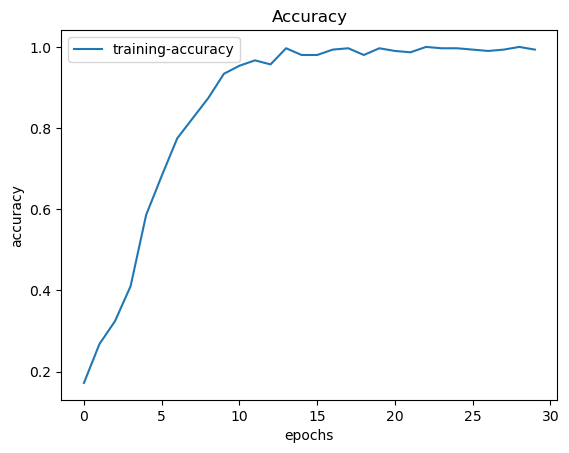

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'training-accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Accuracy and Loss curves

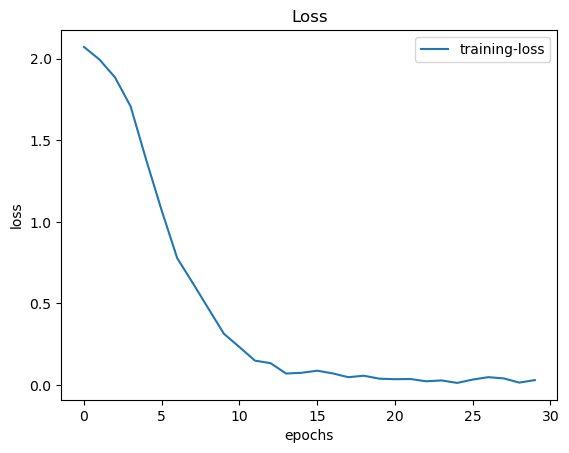

In [103]:
plt.plot(history.history['loss'], label = 'training-loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.show()

### Testing of model on test set and real samples of data

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


pred = model.predict(X_test)
#print(pred)
print(np.argmax(pred[0]))

#pred = np.argmax(model.predict(X_test), axis = 1)
#print(pred)


#cm = confusion_matrix(y_test,pred)
#print('ConfusionMatrix')
#print(cm)

#accuracy = accuracy_score(y_test,pred)
#print(accuracy)

#f1 = f1_score(y_test,pred)
#print(f1)



6/6 [==============================] - 0s 35ms/step
3


In [105]:
print(X_test[1].shape)

(224, 224, 3)


In [108]:
data_path = 'Rott.jpg'
imm = Image.open(data_path)
imm = imm.resize((img_shape, img_shape))
imm = np.array(imm)
np.shape(imm)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ascol = imm.reshape(-1,3)
xx = scaler.fit_transform(ascol)

imm = xx.reshape(imm.shape)

#print(imm)




from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

imm = imm.reshape(1,224,224,3)
#print(imm.shape)
predd = np.argmax(model.predict(imm), axis = 1)
print(predd)

1/1 [==============================] - 0s 23ms/step
[2]
